# Correlation in Python (Movie Portfolio Projects)

In [ ]:
# First import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Now we need to read in the data
df = pd.read_csv(r'D:\1. TAM NEW\DATA ANALYTICS\movies.csv')

In [ ]:
# Now let's take a look at the data (df = data frame)

df.head()

In [ ]:
# Check if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
   

In [ ]:
# Data Types for our columns

print(df.dtypes)

In [ ]:
# Change data type of column Budget
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [ ]:
df.head()

In [ ]:
# Create correct Year column in case Year of Released and Year are not matched
# Need to separate the info from Released col to take Year number only

df['yearcorrect'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

df.head()

In [ ]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
# This step is to create Scrolling Down Arrow:
pd.set_option('display.max_row', 50) # limit to 50 rows

In [ ]:
# Remove any duplicates if present:
#--> show duplicates, returns the distinct 'company' values from the table
df['company'].drop_duplicates().sort_values(ascending=False)

df.drop_duplicates() #--> drop duplicates 

In [ ]:
df.head()

In [ ]:
# Budget high correlation
# Company high correlation


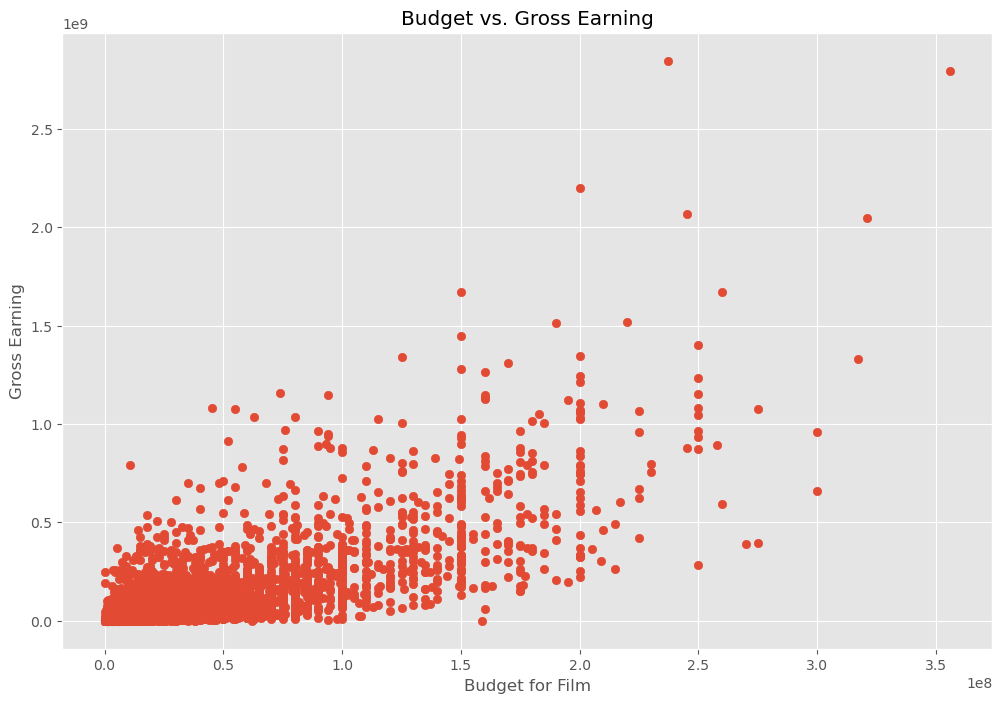

In [104]:
# Scatter plot with budget and gross 

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs. Gross Earning')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earning')

plt.show()

In [ ]:
df.head()

<AxesSubplot:xlabel='budget', ylabel='gross'>

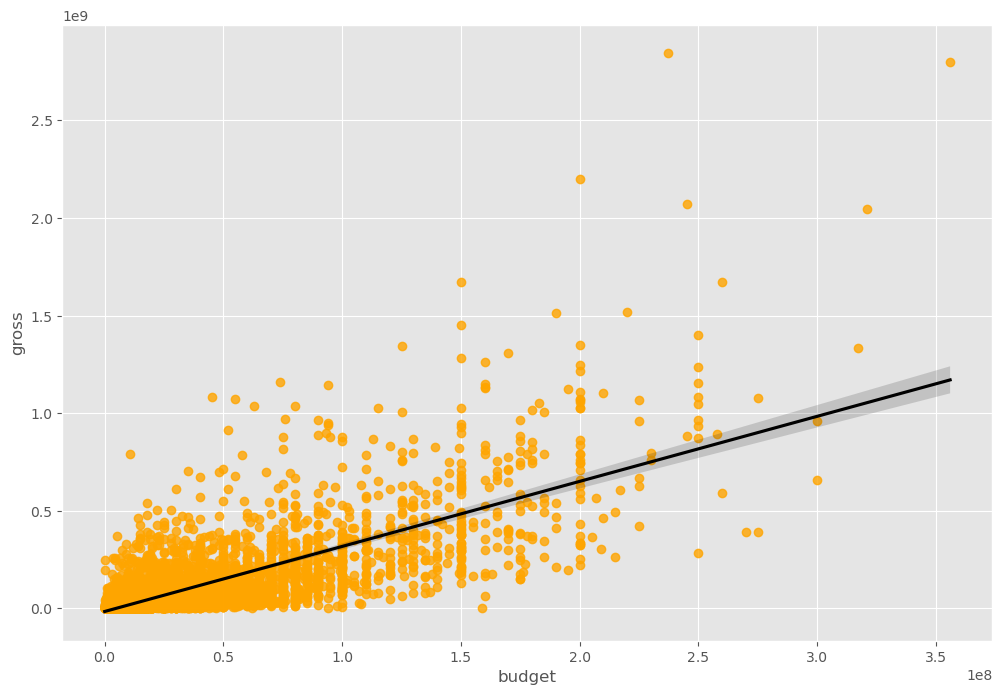

In [105]:
# Plot Budget vs. Gross using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"orange"}, line_kws={"color":"black"})

In [ ]:
# Start looking at corelation

In [ ]:
df.corr(method='pearson' ) # (pearson[default], kendall, spearman --> different types of correlation)

In [ ]:
# Note: high correlation between budget and gross -> correct innitial predict

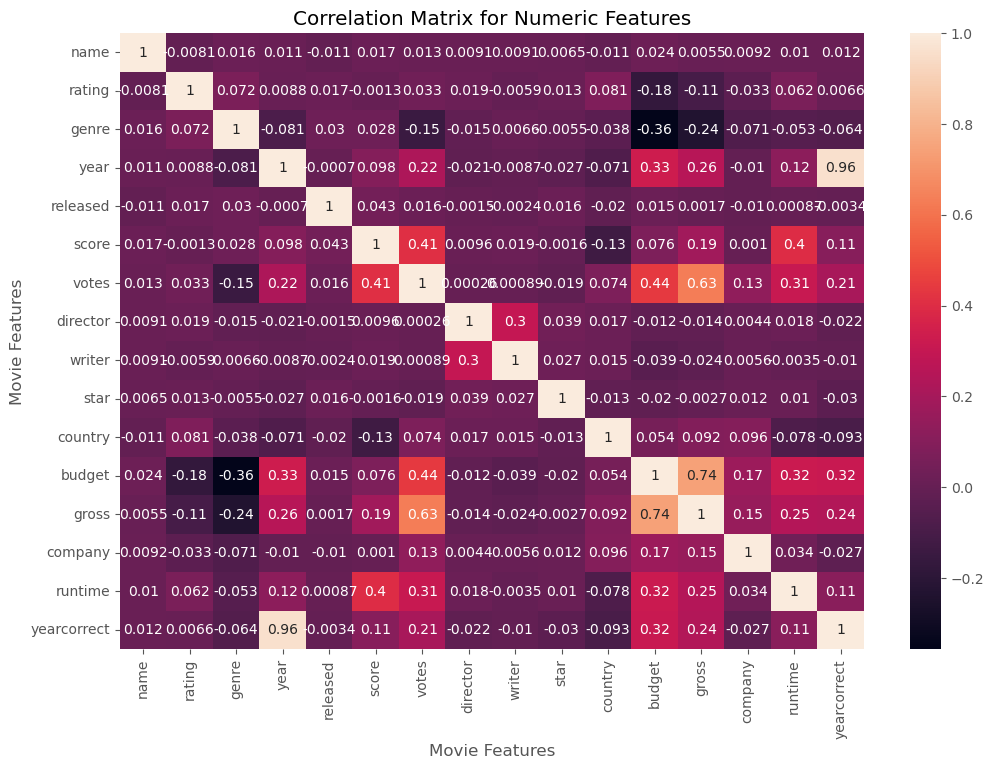

In [103]:
# Building visualization of the above Correlation table (using heatmap and Pearson method)

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [ ]:
# Looking at company vs. gross

df.head()

In [ ]:
# to look at correlation for company vs gross, we have to numerise company
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized        

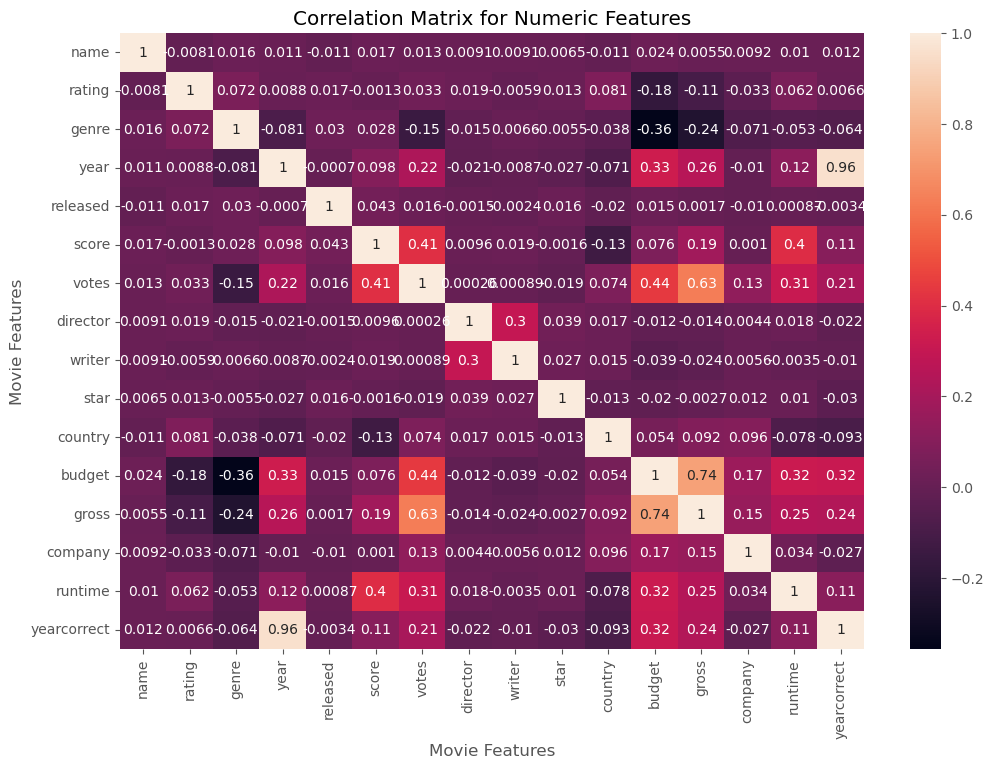

In [106]:
# visualising Correlation matrix using Pearson Correlation after numerizing all fields


correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [ ]:
df_numerized.corr()

In [ ]:
correlation_mat = df_numerized.corr()

# unstack the matrix

corr_pairs = df_numerized.corr().unstack()

corr_pairs

In [ ]:
# sort the unstacked matrix by the correlation value

sorted_pairs = df_numerized.corr().unstack().sort_values(ascending=False)

sorted_pairs

In [ ]:
# Finding the High correlation:

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

In [ ]:
# Votes and Budget have the highest correlation to the Gross Earnings!
# Company has LOW CORRELATION!!!